<a href="https://colab.research.google.com/github/Kiron-Ang/DFHL/blob/main/cortisol_grief.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This IPYNB file was created with Google Colab by Kiron Ang
# Print Python version and install/update/import libraries!
!python -V

!pip install -U polars > output.txt
import polars
print("polars", polars.__version__)

!pip install -U scikit-learn > output.txt
import sklearn
print("scikit-learn", sklearn.__version__)

!pip install -U statsmodels > output.txt
import statsmodels
print("statsmodels", statsmodels.__version__)

!pip install -U matplotlib > output.txt
import matplotlib
print("matplotlib", matplotlib.__version__)

!pip install -U seaborn > output.txt
import seaborn
print("seaborn", seaborn.__version__)

Python 3.10.12
polars 1.9.0
scikit-learn 1.5.2
statsmodels 0.14.4
matplotlib 3.9.2
seaborn 0.13.2


In [ ]:
# read_csv() to store data in a Polars DataFrame
cortisol = polars.read_csv("cortisol - cleansed.csv")
cortisol = cortisol.drop_nulls()
print("cortisol", cortisol.shape)
print("cortisol contains", cortisol.columns)

cortisol (21587, 14)
cortisol contains ['record_id', 'person_id', 'name', 'cortisol', 'year', 'month', 'day', 'collection', 'awakening', 'collection_minutes', 'awakening_minutes', 'difference_minutes', 'age', 'gender']


In [ ]:
# Get data ready for machine learning pipeline!
# S is Son, D is Daughter
family_1 = [151756224, 312288096, 710554240, 410631648, 437663904] # FAMILY 1: S1, D1, S2, D2, D3
family_2 = [980003264, 533873088, 106369672, 676175872, 575183808] # FAMILY 2: S1, S2, S3, S4, D1
family_3 = [412766816, 712730496, 207561136, 633178880] # FAMILY 3: D1, S1, S2, S3

# Grief Event for Family 1: July 28, 1994
# First Grief Event for Family 2: July 26, 1990
# Second Grief Event for Family 2: July 17, 1995
# Grief Event for Family 3: July 12, 1992

before_grief = polars.DataFrame()
after_grief = polars.DataFrame()

# Samples must be collected in the months May, June, July
# August, or September, because all the grief events occurred
# in July and we want to see change near the event.
cortisol = cortisol.filter(polars.col("month") < 10)
cortisol = cortisol.filter(polars.col("month") > 4)

print("cortisol", cortisol.shape)

cortisol (18680, 14)


In [ ]:
# For all families, add to the before_grief DataFrame if the samples
# were collected before a grief event.

#### FAMILY 1 GRIEF EVENT
for id in family_1:

  # Samples must match the id for the current person
  temp = cortisol.filter(polars.col("person_id") == id)

  # Samples must be in the same year as the grief event
  temp = temp.filter(polars.col("year") == 1994)

  # Samples must be before the grief event
  temp = temp.filter(polars.col("month") < 8)
  temp = temp.filter(polars.col("day") < 29)

  # Add the rows to the DataFrame
  before_grief.vstack(temp, in_place = True)

#### FAMILY 2 FIRST GRIEF EVENT
for id in family_2:

  # Samples must match the id for the current person
  temp = cortisol.filter(polars.col("person_id") == id)

  # Samples must be in the same year as the grief event
  temp = temp.filter(polars.col("year") == 1990)

  # Samples must be before the grief event
  temp = temp.filter(polars.col("month") < 8)
  temp = temp.filter(polars.col("day") < 27)

  # Add the rows to the DataFrame
  before_grief.vstack(temp, in_place = True)

#### FAMILY 2 SECOND GRIEF EVENT
for id in family_2:

  # Samples must match the id for the current person
  temp = cortisol.filter(polars.col("person_id") == id)

  # Samples must be in the same year as the grief event
  temp = temp.filter(polars.col("year") == 1995)

  # Samples must be before the grief event
  temp = temp.filter(polars.col("month") < 8)
  temp = temp.filter(polars.col("day") < 18)

  # Add the rows to the DataFrame
  before_grief.vstack(temp, in_place = True)

#### FAMILY 3 GRIEF EVENT
for id in family_3:

  # Samples must match the id for the current person
  temp = cortisol.filter(polars.col("person_id") == id)

  # Samples must be in the same year as the grief event
  temp = temp.filter(polars.col("year") == 1992)

  # Samples must be before the grief event
  temp = temp.filter(polars.col("month") < 8)
  temp = temp.filter(polars.col("day") < 13)

  # Add the rows to the DataFrame
  before_grief.vstack(temp, in_place = True)

before_grief = before_grief.drop_nulls()
print("before_grief", before_grief.shape)
print("before_grief contains", before_grief.columns)

before_grief (142, 14)
before_grief contains ['record_id', 'person_id', 'name', 'cortisol', 'year', 'month', 'day', 'collection', 'awakening', 'collection_minutes', 'awakening_minutes', 'difference_minutes', 'age', 'gender']


In [ ]:
# For all families, add to the after_grief DataFrame if the samples
# were collected after a grief event.

#### FAMILY 1 GRIEF EVENT
for id in family_1:

  # Samples must match the id for the current person
  temp = cortisol.filter(polars.col("person_id") == id)

  # Samples must be in the same year as the grief event
  temp = temp.filter(polars.col("year") == 1994)

  # Samples must be after the grief event
  temp = temp.filter(polars.col("month") > 6)
  temp = temp.filter(polars.col("day") > 27)

  # Add the rows to the DataFrame
  after_grief.vstack(temp, in_place = True)

#### FAMILY 2 FIRST GRIEF EVENT
for id in family_2:

  # Samples must match the id for the current person
  temp = cortisol.filter(polars.col("person_id") == id)

  # Samples must be in the same year as the grief event
  temp = temp.filter(polars.col("year") == 1990)

  # Samples must be before the grief event
  temp = temp.filter(polars.col("month") > 6)
  temp = temp.filter(polars.col("day") > 25)

  # Add the rows to the DataFrame
  after_grief.vstack(temp, in_place = True)

#### FAMILY 2 SECOND GRIEF EVENT
for id in family_2:

  # Samples must match the id for the current person
  temp = cortisol.filter(polars.col("person_id") == id)

  # Samples must be in the same year as the grief event
  temp = temp.filter(polars.col("year") == 1995)

  # Samples must be before the grief event
  temp = temp.filter(polars.col("month") > 6)
  temp = temp.filter(polars.col("day") > 16)

  # Add the rows to the DataFrame
  after_grief.vstack(temp, in_place = True)

#### FAMILY 3 GRIEF EVENT
for id in family_3:

  # Samples must match the id for the current person
  temp = cortisol.filter(polars.col("person_id") == id)

  # Samples must be in the same year as the grief event
  temp = temp.filter(polars.col("year") == 1992)

  # Samples must be before the grief event
  temp = temp.filter(polars.col("month") > 6)
  temp = temp.filter(polars.col("day") > 11)

  # Add the rows to the DataFrame
  after_grief.vstack(temp, in_place = True)

after_grief = after_grief.drop_nulls()
print("after_grief", after_grief.shape)
print("after_grief contains", after_grief.columns)

after_grief (97, 14)
after_grief contains ['record_id', 'person_id', 'name', 'cortisol', 'year', 'month', 'day', 'collection', 'awakening', 'collection_minutes', 'awakening_minutes', 'difference_minutes', 'age', 'gender']


In [ ]:
# Create 4 polars DataFrames to hold inputs and targets for before and after
X_before = before_grief["month", "collection_minutes", "awakening_minutes", "difference_minutes", "age", "gender"]
print("X_before", X_before.shape)
print("X_before contains", X_before.columns)
print(X_before)

y_before = before_grief["cortisol"]
print("y_before", y_before.shape)
print("y_before contains", y_before.name)
print(y_before)

X_after = after_grief["month", "collection_minutes", "awakening_minutes", "difference_minutes", "age", "gender"]
print("X_after", X_after.shape)
print("X_after contains", X_after.columns)
print(X_after)

y_after = after_grief["cortisol"]
print("y_after", y_after.shape)
print("y_after contains", y_after.name)
print(y_after)

X_before (142, 6)
X_before contains ['month', 'collection_minutes', 'awakening_minutes', 'difference_minutes', 'age', 'gender']
shape: (142, 6)
┌───────┬────────────────────┬───────────────────┬────────────────────┬─────┬────────┐
│ month ┆ collection_minutes ┆ awakening_minutes ┆ difference_minutes ┆ age ┆ gender │
│ ---   ┆ ---                ┆ ---               ┆ ---                ┆ --- ┆ ---    │
│ i64   ┆ i64                ┆ i64               ┆ i64                ┆ i64 ┆ i64    │
╞═══════╪════════════════════╪═══════════════════╪════════════════════╪═════╪════════╡
│ 7     ┆ 1060               ┆ 465               ┆ 595                ┆ 7   ┆ 0      │
│ 7     ┆ 1020               ┆ 435               ┆ 585                ┆ 7   ┆ 0      │
│ 6     ┆ 1005               ┆ 425               ┆ 580                ┆ 7   ┆ 0      │
│ 6     ┆ 1000               ┆ 360               ┆ 640                ┆ 7   ┆ 0      │
│ 7     ┆ 980                ┆ 360               ┆ 620                ┆ 7

In [ ]:
# make_pipeline() to organize model steps
import sklearn.pipeline
import sklearn.ensemble

pipeline = sklearn.pipeline.make_pipeline(
    sklearn.ensemble.HistGradientBoostingRegressor(
        random_state = 900, scoring = "r2", validation_fraction = 0.2,
        learning_rate = 0.01, max_iter = 1000, max_leaf_nodes = 10))

# cross_validate() to determine model performance
cross_validate = sklearn.model_selection.cross_validate(
    pipeline, X_before, y_before, cv = 2, verbose = 3)

print("r^2 score for before_grief model:", cross_validate["test_score"].mean())

cross_validate = sklearn.model_selection.cross_validate(
    pipeline, X_after, y_after, cv = 2, verbose = 3)

print("r^2 score for after_grief model:", cross_validate["test_score"].mean())

[CV] END ......................................., score=0.258 total time=   0.3s
[CV] END ......................................., score=0.239 total time=   0.3s
r^2 score for before_grief model: 0.2483078312745477
[CV] END ......................................., score=0.266 total time=   0.3s
[CV] END ......................................., score=0.188 total time=   0.2s
r^2 score for after_grief model: 0.2270540739824538


In [ ]:
# read_csv() to store data in a Polars DataFrame
people = polars.read_csv("cortisol - 14_people.csv")
people = people.drop_nulls()
print("people", people.shape)
print("people contains", people.columns)

people (14, 4)
people contains ['id', 'name', 'gender', 'birth_year']


This is going to get very confusing very quickly. I am simply predicting 4 cortisol measurements: 2 for before grief, and 2 for after grief, for the 14 people in the families mentioned above.

In [ ]:
# Working with before_grief model first.
pipeline.fit(X_before, y_before)

# Extrapolate two cortisol measurements with predict():
# 1) 7 AM in July 2000
# 2) 4 PM in July 2000
# The year picked is arbitrary. It only matters in terms of
# calculating age for the participants in this hypothetical scenario,
# although I want to pick something outside of the range of the grief events
# recorded here (1990 - 1995)

# Add age column; age = 2000 - birth_year
age = polars.Series("age", 2000 - people["birth_year"])
people.insert_column(-1, age)

# Add month column; all grief events happened in July
month = polars.Series("month", [7] * 14)
people.insert_column(-1, month)

# Add awakening_minutes column; assume everyone wakes up at 6 AM
awakening_minutes = polars.Series("awakening_minutes", [360] * 14)
people.insert_column(-1, awakening_minutes)

# Add collection_minutes_1; assume 7 AM
collection_minutes_1 = polars.Series("collection_minutes_1", [420] * 14)
people.insert_column(-1, collection_minutes_1)

# Add collection_minutes_2; assume 4 PM
collection_minutes_2 = polars.Series("collection_minutes_2", [960] * 14)
people.insert_column(-1, collection_minutes_2)

# Add difference_minutes_1
difference_minutes_1 = polars.Series("difference_minutes_1", people["collection_minutes_1"] - people["awakening_minutes"])
people.insert_column(-1, difference_minutes_1)

# Add difference_minutes_2
difference_minutes_2 = polars.Series("difference_minutes_2", people["collection_minutes_2"] - people["awakening_minutes"])
people.insert_column(-1, difference_minutes_2)

print("people", people.shape)
print("people contains", people.columns)

people (14, 11)
people contains ['id', 'name', 'gender', 'age', 'month', 'awakening_minutes', 'collection_minutes_1', 'collection_minutes_2', 'difference_minutes_1', 'difference_minutes_2', 'birth_year']


In [ ]:
# Create new two new Polars DataFrames (X_1, X_2) to
# predict cortisol measurements (cortisol_1, cortisol_2)
X_1 = people["month", "collection_minutes_1", "awakening_minutes", "difference_minutes_1", "age", "gender"]
print("X_1", X_1.shape)
print("X_1 contains", X_1.columns)
print(X_1)

X_2 = people["month", "collection_minutes_2", "awakening_minutes", "difference_minutes_2", "age", "gender"]
print("X_2", X_2.shape)
print("X_2 contains", X_2.columns)
print(X_2)

X_1 (14, 6)
X_1 contains ['month', 'collection_minutes_1', 'awakening_minutes', 'difference_minutes_1', 'age', 'gender']
shape: (14, 6)
┌───────┬──────────────────────┬───────────────────┬──────────────────────┬─────┬────────┐
│ month ┆ collection_minutes_1 ┆ awakening_minutes ┆ difference_minutes_1 ┆ age ┆ gender │
│ ---   ┆ ---                  ┆ ---               ┆ ---                  ┆ --- ┆ ---    │
│ i64   ┆ i64                  ┆ i64               ┆ i64                  ┆ i64 ┆ i64    │
╞═══════╪══════════════════════╪═══════════════════╪══════════════════════╪═════╪════════╡
│ 7     ┆ 420                  ┆ 360               ┆ 60                   ┆ 12  ┆ 0      │
│ 7     ┆ 420                  ┆ 360               ┆ 60                   ┆ 21  ┆ 0      │
│ 7     ┆ 420                  ┆ 360               ┆ 60                   ┆ 16  ┆ 0      │
│ 7     ┆ 420                  ┆ 360               ┆ 60                   ┆ 23  ┆ 0      │
│ 7     ┆ 420                  ┆ 360         

In [ ]:
# Use predict() twice to get two arrays of numbers that
# represent the two extrapolated cortisol measurements
X_1 = X_1.rename({"collection_minutes_1": "collection_minutes", "difference_minutes_1": "difference_minutes"})
cortisol_1 = pipeline.predict(X_1)
print("cortisol_1", cortisol_1.shape)
print(cortisol_1)

X_2 = X_2.rename({"collection_minutes_2": "collection_minutes", "difference_minutes_2": "difference_minutes"})
cortisol_2 = pipeline.predict(X_2)
print("cortisol_2", cortisol_2.shape)
print(cortisol_2)

cortisol_1 (14,)
[0.37382362 0.43469558 0.43469558 0.43469558 0.4063182  0.33904192
 0.43469558 0.43469558 0.43469558 0.4063182  0.43469558 0.4063182
 0.4063182  0.37382362]
cortisol_2 (14,)
[0.19461667 0.26802735 0.26802735 0.26802735 0.23169708 0.14597938
 0.26802735 0.26802735 0.26802735 0.23169708 0.26802735 0.23169708
 0.23169708 0.19461667]


In [ ]:
# Calculate the difference between cortisol_1 and cortisol_2
# This will be plotted against the after grief predictions
before_grief_cortisol_differences = polars.Series("before_grief_cortisol_differences", cortisol_1 - cortisol_2).to_numpy()
print("before_grief_cortisol_differences", before_grief_cortisol_differences.shape)
print(before_grief_cortisol_differences)

before_grief_cortisol_differences (14,)
[0.17920695 0.16666823 0.16666823 0.16666823 0.17462112 0.19306254
 0.16666823 0.16666823 0.16666823 0.17462112 0.16666823 0.17462112
 0.17462112 0.17920695]


In [ ]:
# read_csv() to store data in a Polars DataFrame
people = polars.read_csv("cortisol - 14_people.csv")
people = people.drop_nulls()
print("people", people.shape)
print("people contains", people.columns)

# Working with after_grief model now.
pipeline.fit(X_after, y_after)

# Extrapolate two cortisol measurements with predict():
# 1) 7 AM in July 2000
# 2) 4 PM in July 2000
# The year picked is arbitrary. It only matters in terms of
# calculating age for the participants in this hypothetical scenario,
# although I want to pick something outside of the range of the grief events
# recorded here (1990 - 1995)

# Add age column; age = 2000 - birth_year
age = polars.Series("age", 2000 - people["birth_year"])
people.insert_column(-1, age)

# Add month column; all grief events happened in July
month = polars.Series("month", [7] * 14)
people.insert_column(-1, month)

# Add awakening_minutes column; assume everyone wakes up at 6 AM
awakening_minutes = polars.Series("awakening_minutes", [360] * 14)
people.insert_column(-1, awakening_minutes)

# Add collection_minutes_1; assume 7 AM
collection_minutes_1 = polars.Series("collection_minutes_1", [420] * 14)
people.insert_column(-1, collection_minutes_1)

# Add collection_minutes_2; assume 4 PM
collection_minutes_2 = polars.Series("collection_minutes_2", [960] * 14)
people.insert_column(-1, collection_minutes_2)

# Add difference_minutes_1
difference_minutes_1 = polars.Series("difference_minutes_1", people["collection_minutes_1"] - people["awakening_minutes"])
people.insert_column(-1, difference_minutes_1)

# Add difference_minutes_2
difference_minutes_2 = polars.Series("difference_minutes_2", people["collection_minutes_2"] - people["awakening_minutes"])
people.insert_column(-1, difference_minutes_2)

print("people", people.shape)
print("people contains", people.columns)

people (14, 4)
people contains ['id', 'name', 'gender', 'birth_year']
people (14, 11)
people contains ['id', 'name', 'gender', 'age', 'month', 'awakening_minutes', 'collection_minutes_1', 'collection_minutes_2', 'difference_minutes_1', 'difference_minutes_2', 'birth_year']


In [ ]:
# Create new two new Polars DataFrames (X_1, X_2) to
# predict cortisol measurements (cortisol_1, cortisol_2)
X_1 = people["month", "collection_minutes_1", "awakening_minutes", "difference_minutes_1", "age", "gender"]
print("X_1", X_1.shape)
print("X_1 contains", X_1.columns)
print(X_1)

X_2 = people["month", "collection_minutes_2", "awakening_minutes", "difference_minutes_2", "age", "gender"]
print("X_2", X_2.shape)
print("X_2 contains", X_2.columns)
print(X_2)

X_1 (14, 6)
X_1 contains ['month', 'collection_minutes_1', 'awakening_minutes', 'difference_minutes_1', 'age', 'gender']
shape: (14, 6)
┌───────┬──────────────────────┬───────────────────┬──────────────────────┬─────┬────────┐
│ month ┆ collection_minutes_1 ┆ awakening_minutes ┆ difference_minutes_1 ┆ age ┆ gender │
│ ---   ┆ ---                  ┆ ---               ┆ ---                  ┆ --- ┆ ---    │
│ i64   ┆ i64                  ┆ i64               ┆ i64                  ┆ i64 ┆ i64    │
╞═══════╪══════════════════════╪═══════════════════╪══════════════════════╪═════╪════════╡
│ 7     ┆ 420                  ┆ 360               ┆ 60                   ┆ 12  ┆ 0      │
│ 7     ┆ 420                  ┆ 360               ┆ 60                   ┆ 21  ┆ 0      │
│ 7     ┆ 420                  ┆ 360               ┆ 60                   ┆ 16  ┆ 0      │
│ 7     ┆ 420                  ┆ 360               ┆ 60                   ┆ 23  ┆ 0      │
│ 7     ┆ 420                  ┆ 360         

In [ ]:
# Use predict() twice to get two arrays of numbers that
# represent the two extrapolated cortisol measurements
X_1 = X_1.rename({"collection_minutes_1": "collection_minutes", "difference_minutes_1": "difference_minutes"})
cortisol_1 = pipeline.predict(X_1)
print("cortisol_1", cortisol_1.shape)
print(cortisol_1)

X_2 = X_2.rename({"collection_minutes_2": "collection_minutes", "difference_minutes_2": "difference_minutes"})
cortisol_2 = pipeline.predict(X_2)
print("cortisol_2", cortisol_2.shape)
print(cortisol_2)

cortisol_1 (14,)
[0.30625051 0.33058195 0.33058195 0.33058195 0.33058195 0.30625051
 0.33058195 0.33058195 0.33058195 0.33058195 0.33058195 0.30450618
 0.33058195 0.30625051]
cortisol_2 (14,)
[0.08186253 0.10788213 0.10788213 0.10788213 0.10640144 0.08038184
 0.10788213 0.10788213 0.10788213 0.10640144 0.10788213 0.07934726
 0.10640144 0.08186253]


In [ ]:
# Calculate the difference between cortisol_1 and cortisol_2
# This will be plotted against the after grief predictions
after_grief_cortisol_differences = polars.Series("after_grief_cortisol_differences", cortisol_1 - cortisol_2).to_numpy()
print("after_grief_cortisol_differences", after_grief_cortisol_differences.shape)
print(after_grief_cortisol_differences)

after_grief_cortisol_differences (14,)
[0.22438798 0.22269982 0.22269982 0.22269982 0.2241805  0.22586867
 0.22269982 0.22269982 0.22269982 0.2241805  0.22269982 0.22515892
 0.2241805  0.22438798]


In [ ]:
# Fit robust linear model with statsmodels.api
import statsmodels.api

# Add a constant to the independent variable determine a y-intercept
ols_before_grief_cortisol_differences = statsmodels.api.add_constant(before_grief_cortisol_differences)

# Ordinary least squares linear regression with OLS(dependent variable, independent variable)
ols = statsmodels.api.OLS(after_grief_cortisol_differences, ols_before_grief_cortisol_differences).fit()
print("params:", ols.params)
print("tvalues:", ols.tvalues)
print("pvalues:", ols.pvalues)

params: [0.20100815 0.13122762]
tvalues: [75.08382949  8.46918089]
pvalues: [2.07346910e-17 2.08801376e-06]


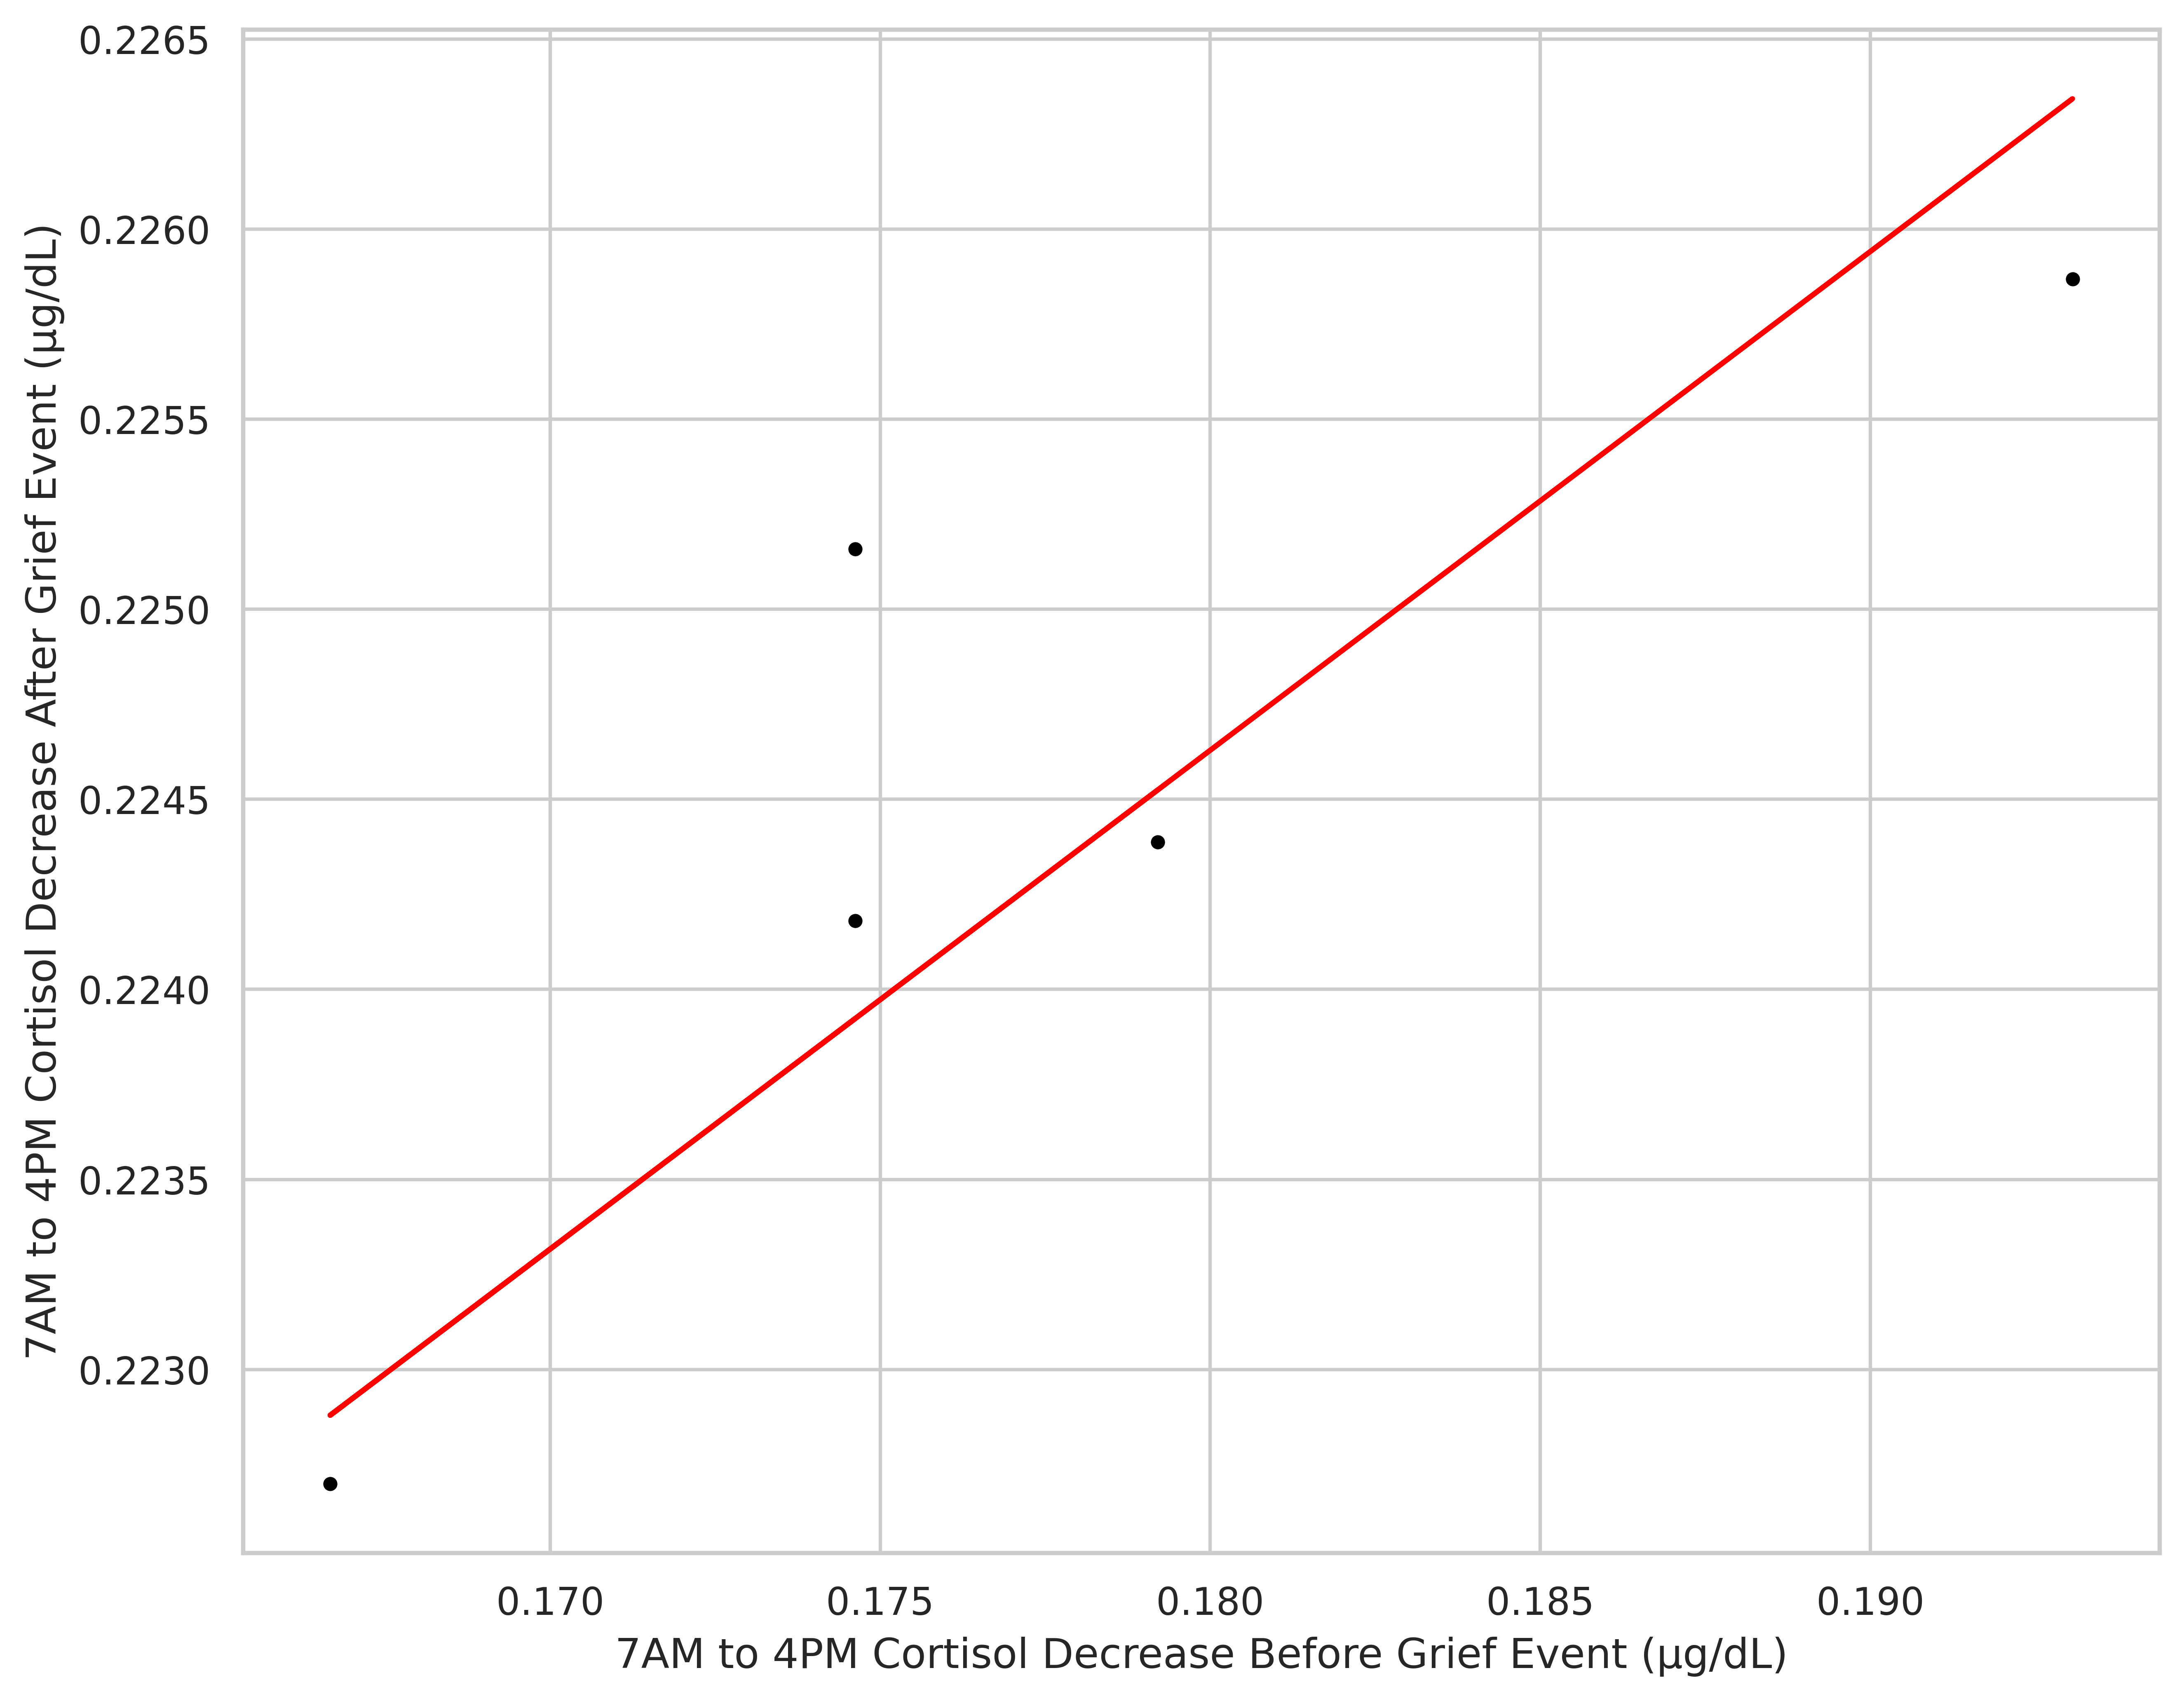

In [ ]:
# Create a scatter plot with matplotlib.pyplot and seaborn
import matplotlib.pyplot

seaborn.set_theme(style="whitegrid")

# Control figure size and resolution with matplotlib.pyplot.figure
matplotlib.pyplot.figure(figsize = (10, 8), dpi = 600)

scatterplot = seaborn.scatterplot(
    y = after_grief_cortisol_differences,
    x = before_grief_cortisol_differences,
    s = 20,
    color = "black"
)

# Plot a red line representing the robust linear model
# with plot(independent variable, dependent variable)
matplotlib.pyplot.plot(before_grief_cortisol_differences, ols.predict(ols_before_grief_cortisol_differences), color = 'red')

# Add labels to the plot
matplotlib.pyplot.ylabel("7AM to 4PM Cortisol Decrease After Grief Event (µg/dL)", fontsize = 12)
matplotlib.pyplot.xlabel("7AM to 4PM Cortisol Decrease Before Grief Event (µg/dL)", fontsize = 12)

# Save the scatter plot!
scatterplot.figure.savefig("cortisol_grief_kiron.png", dpi=600, bbox_inches='tight')